In [131]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
from sklearn.svm import SVC

In [132]:
data = np.loadtxt("hw8_q1.csv",delimiter=",", dtype=float)

In [178]:
def parameters(data, c):
    X = data[:,0:2]
    y = data[:,2]
    model = SVC(C=c, kernel='linear', gamma='auto')
    clf = model.fit(X, y)
    w = model.coef_[0]
    b = model.intercept_[0]
    return w, b, clf
w, b, clf = parameters(data, 1)
V = clf.support_vectors_

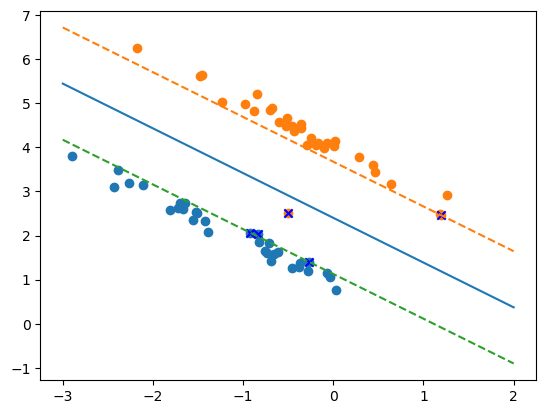

In [182]:
plt.scatter(X[:32,0], X[:32,1])
plt.scatter(X[32:64,0], X[32:64,1])
x_val = np.linspace(-3,2,100)
plt.plot(x_val, -b/w[1] - w[0]/w[1] * x_val, '-')
plt.plot(x_val, -b/w[1] - w[0]/w[1] * x_val - 1/w[1], '--') 
plt.plot(x_val, -b/w[1] - w[0]/w[1] * x_val + 1/w[1], '--') 
plt.scatter(V[:,0], V[:,1], marker='x', color='blue')

In [184]:
c_val = np.logspace(-2,1,100)
for val in c_val:
    wn, bn, clf2 = parameters(data, val)
    if (sum(clf2.predict(X)) == 0):
        best = val
        wb = wn
        bb = bn
        break
    else:
        continue
V2 = clf2.support_vectors_

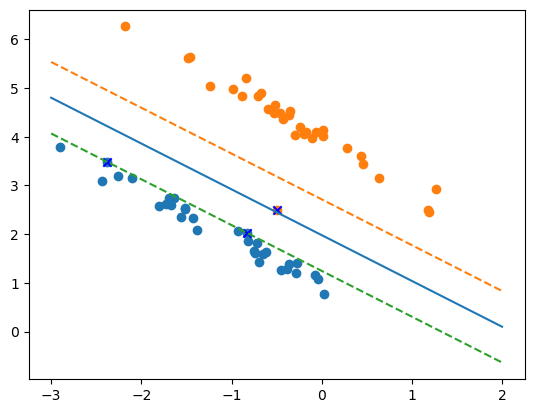

In [185]:
plt.scatter(X[:32,0], X[:32,1])
plt.scatter(X[32:64,0], X[32:64,1])
x_val = np.linspace(-3,2,100)
plt.plot(x_val, -bb/wb[1] - wb[0]/wb[1] * x_val, '-')
plt.plot(x_val, -bb/wb[1] - wb[0]/wb[1] * x_val - 1/wb[1], '--') 
plt.plot(x_val, -bb/wb[1] - wb[0]/wb[1] * x_val + 1/wb[1], '--') 
plt.scatter(V2[:,0], V2[:,1], marker='x', color='blue')